In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
data = pd.read_csv("hs.csv")

In [123]:
data.head()

,tic,date,close,high,low,div,adjustment_factor
0,3,0 days,0.496216,0.496821,0.482894,NaN,1.0
1,3,1 days,0.586437,0.594914,0.506206,NaN,1.0
2,3,2 days,0.605510,0.611838,0.578868,NaN,1.0
3,3,5 days,0.604905,0.623675,0.591281,NaN,1.0
4,3,6 days,0.602483,0.607629,0.594914,NaN,1.0


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140447 entries, 0 to 140446
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tic                140447 non-null  int64  
 1   date               140447 non-null  object 
 2   close              140445 non-null  float64
 3   high               140444 non-null  float64
 4   low                140445 non-null  float64
 5   div                1391 non-null    float64
 6   adjustment_factor  140445 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 7.5+ MB


In [162]:
data = data[data["tic"] < 10]
data_1 = data.copy()
data_1["date"] = data["date"].apply(lambda x: int(x.split(" ")[0]))
data_1.sort_values(by="date")
data_1["adj_close"] = data_1["close"] / data_1["adjustment_factor"]

In [163]:
P = data_1.pivot(index = 'date', columns = 'tic', values = 'adj_close')

In [128]:
P.head()

tic,0,1,2,3,4,5,6,7,8,9
date,,,,,,,,,,
0,1.136669,1.606897,0.925028,0.496216,1.000000,2.362661,1.000000,1.321060,0.929495,0.874444
1,1.167175,1.626207,0.908027,0.586437,0.960768,2.302575,1.013373,1.342047,0.945353,0.873472
2,1.153142,1.633793,0.911093,0.605510,0.981598,2.311159,1.019532,1.388807,0.984630,0.887083
5,1.203783,1.579310,0.921126,0.604905,1.005865,2.336481,1.020940,1.384389,1.000244,0.876528
6,1.191580,1.559310,0.919732,0.602483,0.991911,2.274249,1.012141,1.364138,0.983899,0.862500


<AxesSubplot:xlabel='date'>

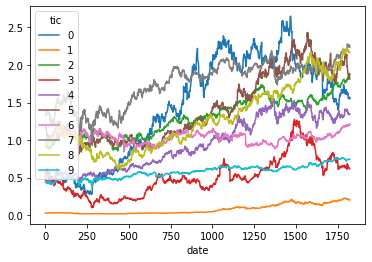

In [164]:
P.plot()

<AxesSubplot:xlabel='date'>

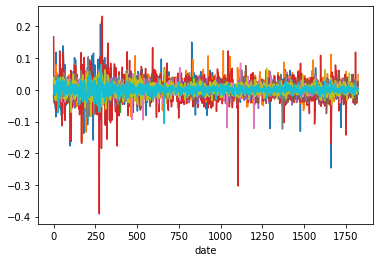

In [165]:
DlogR = np.log(P).diff()
DlogR.plot(legend=False)

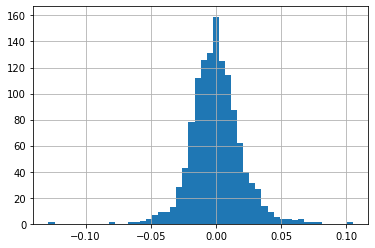

In [100]:
DlogR[10].hist(bins=50);

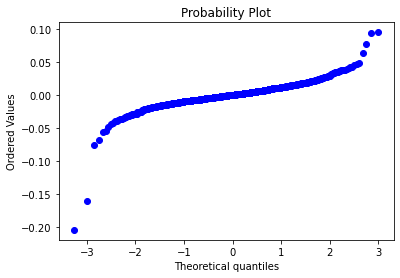

In [104]:
from scipy.stats import probplot

probplot(DlogR[100], plot = plt);

In [166]:
# Returns
R = np.exp(DlogR)
R.corr()

tic,0,1,2,3,4,5,6,7,8,9
tic,,,,,,,,,,
0,1.000000,0.347714,0.324525,0.361974,0.174235,0.205613,0.293612,0.391954,0.262187,0.323203
1,0.347714,1.000000,0.242335,0.339664,0.199881,0.208157,0.267417,0.323180,0.248661,0.291505
2,0.324525,0.242335,1.000000,0.252971,0.197594,0.209686,0.304559,0.486540,0.322944,0.468608
3,0.361974,0.339664,0.252971,1.000000,0.151515,0.175179,0.273094,0.374815,0.267121,0.297022
4,0.174235,0.199881,0.197594,0.151515,1.000000,0.771881,0.241147,0.279872,0.232040,0.256607
5,0.205613,0.208157,0.209686,0.175179,0.771881,1.000000,0.248366,0.285224,0.232124,0.260584
6,0.293612,0.267417,0.304559,0.273094,0.241147,0.248366,1.000000,0.426038,0.346500,0.414757
7,0.391954,0.323180,0.486540,0.374815,0.279872,0.285224,0.426038,1.000000,0.423801,0.639712
8,0.262187,0.248661,0.322944,0.267121,0.232040,0.232124,0.346500,0.423801,1.000000,0.384332


<AxesSubplot:xlabel='tic', ylabel='tic'>

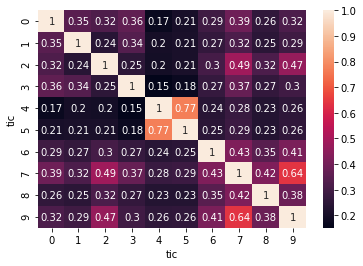

In [168]:
sns.heatmap(R.corr(), annot=True)

In [169]:
meanR = R.mean() - 1
meanR

tic
0    0.001250
1    0.001909
2    0.000604
3    0.000917
4    0.000987
5    0.000526
6    0.000265
7    0.000556
8    0.000822
9    0.000496
dtype: float64

In [485]:
def calculate_sharpe_ratio(first_date, last_date, returns):
    risk_less_return = 0.04
    mean_return = returns[first_date:last_date].mean()
    std_dev = returns[first_date:last_date].std()
    sharpe_ratio = (mean_return - np.e**(risk_less_return * 1/365)) / std_dev
    return np.array(sharpe_ratio)

def calculate_result(wealth, returns, strategy, initial_step, number_of_steps):
    allocation = wealth * strategy
    for i in range(number_of_steps):
        allocation = allocation * np.array(returns[initial_step+i:initial_step + i+1])[0]
    return np.array(allocation)

def calculate_portfolio_sharpe_ratio(strategy, sharpe_ratio):
    return strategy @ sharpe_ratio / sum([1 for i in strategy if i > 1e-4])
    
    
    

In [543]:
from scipy.optimize import minimize 


def simulate(wealth, returns, first_step, step_size):
    history_check = step_size * 2
    wealths = []
    days = []
    for i in range(first_step, len(returns), step_size):
        days.append(i)
        number_of_assets = returns.shape[1]
        j = max(0, i - history_check)
        steps_to_make = min(step_size, len(returns) - step_size - i)
        sharpe_ratio = calculate_sharpe_ratio(j, i, returns)
        
        
        portfolio_ratio_tilde = lambda x: -calculate_portfolio_sharpe_ratio(x, sharpe_ratio)
        lb = 0
        ub = 1
        bnds = tuple([(lb,ub) for x in range(number_of_assets)])
        first_attempt = np.repeat(1/number_of_assets, number_of_assets)
        strategy = first_attempt

#         sol = minimize(portfolio_ratio_tilde, 
#                        x0=first_attempt,
#                        constraints={'type': 'eq', 'fun': lambda x: x@np.ones(number_of_assets)-1}, 
#                        bounds = bnds,
#                       tol = 10**-3)

#         strategy = sol.x
        
        step_final_allocation = calculate_result(wealth, returns, strategy, i, steps_to_make)
        wealth = step_final_allocation.sum()
        wealths.append(wealth)
#     return wealth
    return wealths, days
    

In [544]:
wealths,days = simulate(100, R, 10, 10)

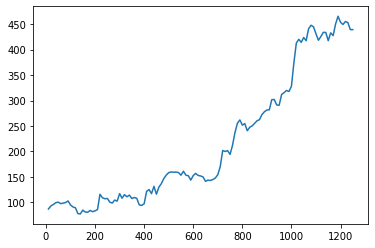

In [542]:
plt.plot(days,wealths)

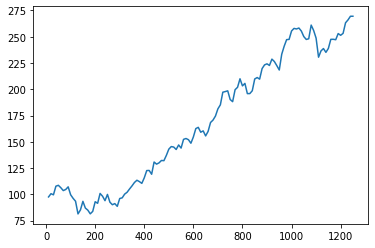

In [545]:
plt.plot(days,wealths)